In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# import pandas as pd

In [ ]:
df = pd.read_csv("Crimes Subset.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,FALSE,...,42.0,32,11,NaN,NaN,2015,08-01-2017 15:52,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,FALSE,...,36.0,19,11,NaN,NaN,2018,04-06-2019 16:04,NaN,NaN,NaN
2,11645836,JC212333,05-01-2016 00:25,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,FALSE,...,15.0,63,11,NaN,NaN,2016,04-06-2019 16:04,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,FALSE,...,33.0,14,08A,NaN,NaN,2018,04-06-2019 16:04,NaN,NaN,NaN
4,11645601,JC212935,06-01-2014 00:01,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,FALSE,...,21.0,71,11,NaN,NaN,2014,04-06-2019 16:04,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747 entries, 0 to 4746
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    4747 non-null   object 
 1   Case Number           4747 non-null   object 
 2   Date                  4747 non-null   object 
 3   Block                 4747 non-null   object 
 4   IUCR                  4747 non-null   object 
 5   Primary Type          4747 non-null   object 
 6   Description           4745 non-null   object 
 7   Location Description  4724 non-null   object 
 8   Arrest                4747 non-null   bool   
 9   Domestic              4747 non-null   object 
 10  Beat                  4747 non-null   int64  
 11  District              4747 non-null   int64  
 12  Ward                  4743 non-null   float64
 13  Community Area        4744 non-null   object 
 14  FBI Code              4739 non-null   object 
 15  X Coordinate         

# **Five Number Summary of Numeric Data**

In [ ]:
numerics = ['int16', 'int32', 'int64','float16', 'float32', 'float64']
df2 = df.select_dtypes(include=numerics)
df2.head(15)

,Beat,District,Ward,X Coordinate,Y Coordinate,Latitude
0,111,1,42.0,NaN,NaN,NaN
1,2515,25,36.0,NaN,NaN,NaN
2,824,8,15.0,NaN,NaN,NaN
3,1724,17,33.0,NaN,NaN,NaN
4,2222,22,21.0,NaN,NaN,NaN
5,631,6,8.0,NaN,NaN,NaN
6,2515,25,30.0,NaN,NaN,NaN
7,631,6,6.0,NaN,NaN,NaN
8,811,8,23.0,NaN,NaN,NaN
9,1511,15,29.0,NaN,NaN,NaN


In [ ]:
five_number_summary = df.describe().transpose()[['min', '25%', '50%', '75%', 'max']]
five_number_summary

,min,25%,50%,75%,max
Beat,1.000000e+00,6.120000e+02,1.024000e+03,1.723000e+03,2.535000e+03
District,1.000000e+00,5.500000e+00,1.000000e+01,1.700000e+01,5.000000e+01
Ward,1.000000e+00,1.000000e+01,2.200000e+01,3.300000e+01,7.300000e+01
X Coordinate,1.100256e+06,1.152966e+06,1.166478e+06,1.176636e+06,1.947616e+06
Y Coordinate,2.012000e+03,1.858977e+06,1.890170e+06,1.909168e+06,1.951493e+06
Latitude,-8.770050e+01,4.176885e+01,4.185483e+01,4.190702e+01,4.202254e+01


In [ ]:
'''The outliers of the District column indicate that these districts are less likely to have crime'''
cols=['District']
outliers = {}
for coln in cols:
    Q1 = df[coln].quantile(0.25)
    Q3 = df[coln].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    coln_outliers = df[(df[coln] < lower_bound) | (df[coln] > upper_bound)][coln]
    outliers[coln] = coln_outliers

print("Potential outliers:",outliers)
print(outliers)

Potential outliers: {'District': 135    42
140    46
141    50
Name: District, dtype: int64}
{'District': 135    42
140    46
141    50
Name: District, dtype: int64}


In [ ]:
cleaned_df = df[~df['District'].isin(outliers['District'])]
print("Cleaned DataFrame shape:", cleaned_df.shape)

Cleaned DataFrame shape: (4744, 22)


# **Delete the columns we do not require**

In [ ]:
columns_to_drop = ['Case Number', 'Date','Block', 'Domestic', 'Beat', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Location','Updated On']
df.drop(columns=columns_to_drop, inplace=True)
df

,ID,IUCR,Primary Type,Description,Location Description,Arrest,District,FBI Code,Year,Latitude,Longitude
0,11037294,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,1,11,2015,NaN,NaN
1,11646293,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,25,11,2018,NaN,NaN
2,11645836,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,8,11,2016,NaN,NaN
3,11645959,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,17,08A,2018,NaN,NaN
4,11645601,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,22,11,2014,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4742,4855753,484,BATTERY,PRO EMP HANDS NO/MIN INJURY,CTA BUS,False,9,08B,2006,41.815228,-87.70239024
4743,4784849,460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,True,15,08B,2006,41.882858,-87.76659936
4744,4937857,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,10,18,2006,41.858490,-87.71766176
4745,4923790,530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,RESIDENCE PORCH/HALLWAY,False,25,04A,2006,41.915840,-87.72774016


# **Handling Null Values**

In [ ]:
df.isnull().head(10)

,ID,IUCR,Primary Type,Description,Location Description,Arrest,District,FBI Code,Year,Latitude,Longitude
0,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,True,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,True,True
5,False,False,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False,False,False,True,True
8,False,False,False,False,False,False,False,False,False,True,True
9,False,False,False,False,True,False,False,False,False,True,True


In [ ]:
columns_with_null = df.columns[df.isnull().any()]
for col in columns_with_null:
    print(f"Column '{col}' has {df[col].isnull().sum()} null values.")

Column 'Description' has 2 null values.
Column 'Location Description' has 23 null values.
Column 'FBI Code' has 8 null values.
Column 'Latitude' has 181 null values.
Column 'Longitude' has 181 null values.


# **Remove Null Values**

In [ ]:
drop_df = df.dropna()
drop_df

,ID,IUCR,Primary Type,Description,Location Description,Arrest,District,FBI Code,Year,Latitude,Longitude
11,12045583,820,THEFT,$500 AND UNDER,APARTMENT,False,2,6,2020,41.830482,-87.62175175
12,12031001,460,BATTERY,SIMPLE,APARTMENT,True,9,08B,2020,41.836310,-87.63962411
13,12093529,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,4,04A,2020,41.747610,-87.54917933
14,12178140,460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,7,08B,2020,41.774878,-87.67137487
15,4144897,430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,7,04B,2005,41.781003,-87.65210712
...,...,...,...,...,...,...,...,...,...,...,...
4742,4855753,484,BATTERY,PRO EMP HANDS NO/MIN INJURY,CTA BUS,False,9,08B,2006,41.815228,-87.70239024
4743,4784849,460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,True,15,08B,2006,41.882858,-87.76659936
4744,4937857,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,10,18,2006,41.858490,-87.71766176
4745,4923790,530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,RESIDENCE PORCH/HALLWAY,False,25,04A,2006,41.915840,-87.72774016


In [ ]:
drop_df.describe()

,District,Latitude
count,4558.000000,4558.000000
mean,11.142606,41.700516
std,7.023946,4.287709
min,1.000000,-87.700504
25%,6.000000,41.768777
50%,10.000000,41.854861
75%,17.000000,41.907024
max,50.000000,42.022536


In [ ]:
def print_mean_mode(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            mean_value = df[col].mean()
            print(f"Mean of '{col}': {mean_value}")
        else:
            mode_value = df[col].mode().iloc[0]
            print(f"Mode of '{col}': {mode_value}")

print_mean_mode(df)

Mode of 'ID': 10418065
Mode of 'IUCR': 486
Mode of 'Primary Type': THEFT
Mode of 'Description': SIMPLE
Mode of 'Location Description': STREET
Mean of 'Arrest': 0.214661891721087
Mean of 'District': 11.158837160311776
Mode of 'FBI Code': 6
Mode of 'Year': 2005
Mean of 'Latitude': 41.70075675614762
Mode of 'Longitude': -87.62634257


In [ ]:
def fill_null_with_mean_mode(df):
    for col in df.columns:
        if df[col].isnull().any():
            if pd.api.types.is_numeric_dtype(df[col]):
                fill_value = df[col].mean()
                print(f"Filling null values in column '{col}' with mean: {fill_value}")
            else:
                fill_value = df[col].mode().iloc[0]
                print(f"Filling null values in column '{col}' with mode: {fill_value}")
            df[col].fillna(fill_value, inplace=True)
    return df

df_filled = fill_null_with_mean_mode(df)
df.head(15)

Filling null values in column 'Description' with mode: SIMPLE
Filling null values in column 'Location Description' with mode: STREET
Filling null values in column 'FBI Code' with mode: 6
Filling null values in column 'Latitude' with mean: 41.70075675614762
Filling null values in column 'Longitude' with mode: -87.62634257


,ID,IUCR,Primary Type,Description,Location Description,Arrest,District,FBI Code,Year,Latitude,Longitude
0,11037294,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,1,11,2015,41.700757,-87.62634257
1,11646293,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,25,11,2018,41.700757,-87.62634257
2,11645836,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,8,11,2016,41.700757,-87.62634257
3,11645959,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,17,08A,2018,41.700757,-87.62634257
4,11645601,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,22,11,2014,41.700757,-87.62634257
5,11646166,810,THEFT,OVER $500,RESIDENCE,False,6,6,2018,41.700757,-87.62634257
6,11645648,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,25,11,2018,41.700757,-87.62634257
7,11645557,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,6,11,2018,41.700757,-87.62634257
8,11645527,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,8,11,2015,41.700757,-87.62634257
9,11645833,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,15,11,2012,41.700757,-87.62634257


In [ ]:
df.describe()

,District,Latitude
count,4747.000000,4747.000000
mean,11.158837,41.700757
std,7.064722,4.201472
min,1.000000,-87.700504
25%,5.500000,41.763623
50%,10.000000,41.847665
75%,17.000000,41.903913
max,50.000000,42.022536


# **Normalize Year Column**

In [ ]:
year_bins = df['Year'].astype(str).unique()
year_bins

array(['2015', '2018', '2016', '2014', '2012', '2020', '2005', '2017',
       '2019', '2023', '2006', '2004', '09/14/2023 03:43:09 PM',
       '09/14/2023 03:41:59 PM', '03/22/2019 04:21:33 PM',
       '10/28/2023 03:40:48 PM', '03/28/2019 04:07:08 PM', '2021', '2001',
       '2011', '2022', '2010', '2008', '2013', '2002', '2003', '2007',
       '2009'], dtype=object)

In [ ]:
df['Year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year

#Handle NaN values with the mode of the 'Year' column
mode_year = df['Year'].mode()[0]
df['Year'] = df['Year'].fillna(mode_year).astype(int)

In [ ]:
year_bins = df['Year'].astype(str).unique()
year_bins

array(['2015', '2018', '2016', '2014', '2012', '2020', '2005', '2017',
       '2019', '2023', '2006', '2004', '2021', '2001', '2011', '2022',
       '2010', '2008', '2013', '2002', '2003', '2007', '2009'],
      dtype=object)

# Now we can check year-wise crime

In [ ]:
# Yearwise count of crime
crime_counts = df['Year'].value_counts()
print(crime_counts)

Year
2005    2270
2023     887
2021     802
2020     338
2006     224
2022      53
2018      49
2019      25
2004      16
2002      12
2017      12
2016      11
2014      10
2008      10
2015       8
2012       7
2010       3
2013       3
2003       3
2011       1
2001       1
2007       1
2009       1
Name: count, dtype: int64


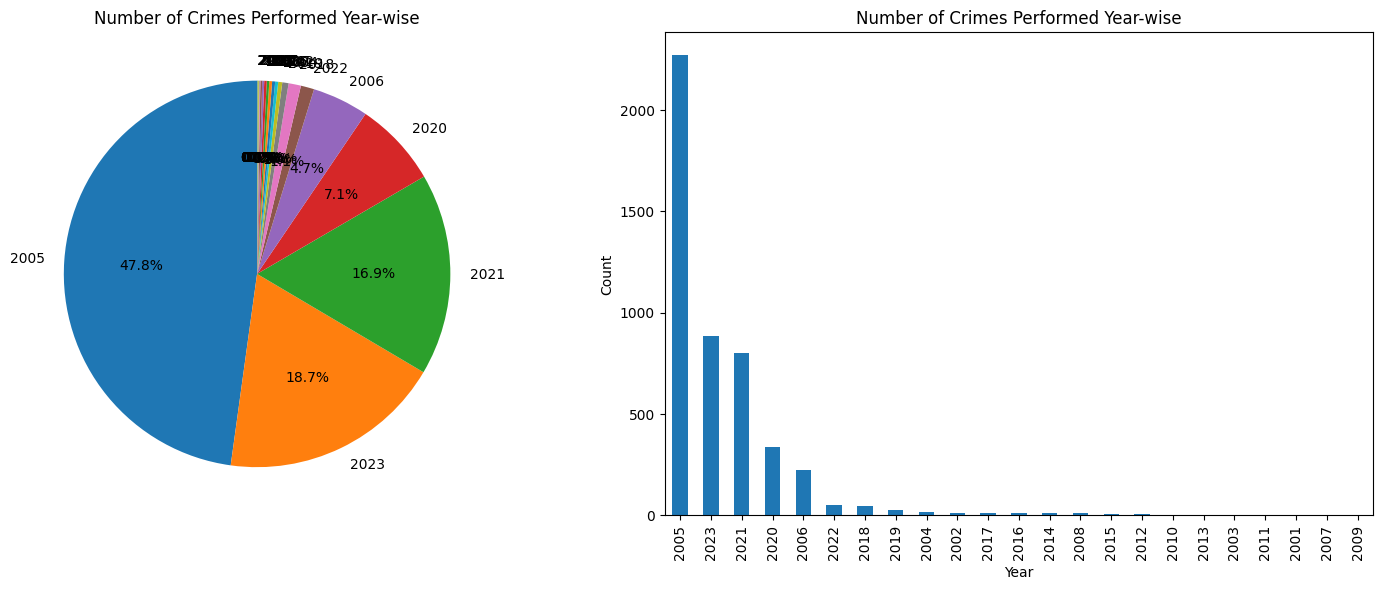

In [ ]:
crime_counts = df['Year'].value_counts()

plt.figure(figsize=(15, 6)) #piechart
# Subplot for the pie chart
plt.subplot(1, 2, 1)
crime_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Number of Crimes Performed Year-wise')
plt.ylabel('')

# Subplot for the bar graph
plt.subplot(1, 2, 2)
crime_counts.plot(kind='bar')
plt.title('Number of Crimes Performed Year-wise')
plt.xlabel('Year')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Map Arrest True False Values to 0 & 1

In [ ]:
# Assuming the column containing 'True' or 'False' values is named 'boolean_column'
df['Arrest Bin'] = df['Arrest'].map({True: 0, False: 1})
df.drop('Arrest',axis=1)
df.head()

,ID,IUCR,Primary Type,Description,Location Description,Arrest,District,FBI Code,Year,Latitude,Longitude,Arrest Bin
0,11037294,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,1,11,2015,41.700757,-87.62634257,1
1,11646293,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,25,11,2018,41.700757,-87.62634257,1
2,11645836,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,8,11,2016,41.700757,-87.62634257,1
3,11645959,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,17,08A,2018,41.700757,-87.62634257,1
4,11645601,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,22,11,2014,41.700757,-87.62634257,1


In [ ]:
df = pd.read_csv("Crimes Subset.csv")
columns_to_drop = ['Case Number', 'Date','Block', 'Domestic', 'Beat', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Location','Updated On']
df.drop(columns=columns_to_drop, inplace=True)
df['Year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year
df.dropna()
#Handle NaN values with the mode of the 'Year' column
mode_year = df['Year'].mode()[0]
df['Year'] = df['Year'].fillna(mode_year).astype(int)

# **Mapping With Broader Categories**

In [ ]:
temp = df['Location Description'].astype(str).unique()
temp

array(['BANK', 'APARTMENT', 'nan', 'RESIDENCE', 'OTHER', 'STREET',
       'RESIDENCE - PORCH / HALLWAY', 'CTA TRAIN', 'HOTEL / MOTEL',
       'RESIDENCE PORCH/HALLWAY', 'RESTAURANT',
       'PARKING LOT / GARAGE (NON RESIDENTIAL)', 'SIDEWALK',
       'OTHER (SPECIFY)', 'GAS STATION', 'GROCERY FOOD STORE',
       'ATM (AUTOMATIC TELLER MACHINE)', 'VEHICLE NON-COMMERCIAL',
       'ALLEY', 'CURRENCY EXCHANGE', 'NURSING / RETIREMENT HOME',
       'SMALL RETAIL STORE', 'COMMERCIAL / BUSINESS OFFICE',
       'HOSPITAL BUILDING / GROUNDS', 'RESIDENCE - YARD (FRONT / BACK)',
       'RESIDENCE - GARAGE', 'BAR OR TAVERN', 'FALSE', 'TRUE',
       'TAVERN / LIQUOR STORE', 'CTA PLATFORM',
       'NURSING HOME/RETIREMENT HOME', 'CHA HALLWAY/STAIRWELL/ELEVATOR',
       'PARK PROPERTY', 'DEPARTMENT STORE', 'ATHLETIC CLUB',
       'CTA PARKING LOT / GARAGE / OTHER PROPERTY', 'ABANDONED BUILDING',
       'CONVENIENCE STORE', 'PARKING LOT/GARAGE(NON.RESID.)',
       'CHA APARTMENT', 'CHA PARKING LOT/GROU

In [ ]:
# Mapping of location descriptions to groups
location_mapping = {
    'BANK': 'COMMERCIAL BUILDING',
    'APARTMENT': 'RESIDENCE',
    'STREET': 'PUBLIC PLACE',
    'RESIDENCE': 'RESIDENCE',
    'OTHER': 'OTHER',
    'RESIDENCE - PORCH / HALLWAY': 'RESIDENCE',
    'CTA TRAIN': 'PUBLIC TRANSPORT',
    'HOTEL / MOTEL': 'PUBLIC PLACE',
    'RESIDENCE PORCH/HALLWAY': 'RESIDENCE',
    'RESTAURANT': 'COMMERCIAL BUILDING',
    'PARKING LOT / GARAGE (NON RESIDENTIAL)': 'PUBLIC PLACE',
    'SIDEWALK': 'PUBLIC PLACE',
    'OTHER (SPECIFY)': 'OTHER',
    'GAS STATION': 'PUBLIC PLACE',
    'GROCERY FOOD STORE': 'COMMERCIAL BUILDING',
    'ATM (AUTOMATIC TELLER MACHINE)': 'COMMERCIAL BUILDING',
    'VEHICLE NON-COMMERCIAL': 'PUBLIC PLACE',
    'ALLEY': 'PUBLIC PLACE',
    'CURRENCY EXCHANGE': 'COMMERCIAL BUILDING',
    'NURSING / RETIREMENT HOME': 'PUBLIC PLACE',
    'SMALL RETAIL STORE': 'COMMERCIAL BUILDING',
    'COMMERCIAL / BUSINESS OFFICE': 'COMMERCIAL BUILDING',
    'HOSPITAL BUILDING / GROUNDS': 'PUBLIC PLACE',
    'RESIDENCE - YARD (FRONT / BACK)': 'RESIDENCE',
    'RESIDENCE - GARAGE': 'RESIDENCE',
    'BAR OR TAVERN': 'COMMERCIAL BUILDING',
    'FALSE': 'OTHER',
    'TRUE': 'OTHER',
    'TAVERN / LIQUOR STORE': 'COMMERCIAL BUILDING',
    'CTA PLATFORM': 'PUBLIC TRANSPORT',
    'NURSING HOME/RETIREMENT HOME': 'PUBLIC PLACE',
    'CHA HALLWAY/STAIRWELL/ELEVATOR': 'PUBLIC PLACE',
    'PARK PROPERTY': 'PUBLIC PLACE',
    'DEPARTMENT STORE': 'COMMERCIAL BUILDING',
    'ATHLETIC CLUB': 'PUBLIC PLACE',
    'CTA PARKING LOT / GARAGE / OTHER PROPERTY': 'PUBLIC PLACE',
    'ABANDONED BUILDING': 'PUBLIC PLACE',
    'CONVENIENCE STORE': 'COMMERCIAL BUILDING',
    'PARKING LOT/GARAGE(NON.RESID.)': 'PUBLIC PLACE',
    'CHA APARTMENT': 'RESIDENCE',
    'CHA PARKING LOT/GROUNDS': 'PUBLIC PLACE',
    'HIGHWAY / EXPRESSWAY': 'PUBLIC PLACE',
    'SCHOOL, PRIVATE, BUILDING': 'EDUCATIONAL BUILDING',
    'TAXICAB': 'PUBLIC TRANSPORT',
    'OTHER COMMERCIAL TRANSPORTATION': 'PUBLIC TRANSPORT',
    'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA': 'PUBLIC PLACE',
    'SCHOOL - PUBLIC GROUNDS': 'EDUCATIONAL BUILDING',
    'SCHOOL - PUBLIC BUILDING': 'EDUCATIONAL BUILDING',
    'CTA BUS': 'PUBLIC TRANSPORT',
    'POLICE FACILITY / VEHICLE PARKING LOT': 'PUBLIC PLACE',
    'VEHICLE - DELIVERY TRUCK': 'PUBLIC PLACE',
    'DRIVEWAY - RESIDENTIAL': 'RESIDENCE',
    'DRUG STORE': 'COMMERCIAL BUILDING',
    'AUTO / BOAT / RV DEALERSHIP': 'PUBLIC PLACE',
    'LIBRARY': 'PUBLIC PLACE',
    'GOVERNMENT BUILDING / PROPERTY': 'PUBLIC PLACE',
    'CHURCH / SYNAGOGUE / PLACE OF WORSHIP': 'PUBLIC PLACE',
    'BARBERSHOP': 'COMMERCIAL BUILDING',
    'HALLWAY': 'PUBLIC PLACE',
    'HOTEL/MOTEL': 'PUBLIC PLACE',
    'RESIDENCE-GARAGE': 'RESIDENCE',
    'VACANT LOT/LAND': 'PUBLIC PLACE',
    'TAVERN/LIQUOR STORE': 'COMMERCIAL BUILDING',
    'RESIDENTIAL YARD (FRONT/BACK)': 'RESIDENCE',
    'SCHOOL, PUBLIC, GROUNDS': 'EDUCATIONAL BUILDING',
    'DAY CARE CENTER': 'PUBLIC PLACE',
    'GOVERNMENT BUILDING/PROPERTY': 'PUBLIC PLACE',
    'VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)': 'PUBLIC TRANSPORT',
    'VACANT LOT / LAND': 'PUBLIC PLACE',
    'CONSTRUCTION SITE': 'PUBLIC PLACE',
    'AIRPORT PARKING LOT': 'PUBLIC PLACE',
    'SCHOOL - PRIVATE BUILDING': 'EDUCATIONAL BUILDING',
    'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA': 'PUBLIC PLACE',
    'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA': 'PUBLIC PLACE',
    'MEDICAL / DENTAL OFFICE': 'PUBLIC PLACE',
    'CHA PARKING LOT / GROUNDS': 'PUBLIC PLACE',
    'SCHOOL - PRIVATE GROUNDS': 'EDUCATIONAL BUILDING',
    'LAKEFRONT / WATERFRONT / RIVERBANK': 'PUBLIC PLACE',
    'HOSPITAL BUILDING/GROUNDS': 'PUBLIC PLACE',
    'CHA HALLWAY / STAIRWELL / ELEVATOR': 'PUBLIC PLACE',
    'CTA STATION': 'PUBLIC TRANSPORT',
    'CLEANING STORE': 'COMMERCIAL BUILDING',
    'FACTORY/MANUFACTURING BUILDING': 'COMMERCIAL BUILDING',
    'CHURCH/SYNAGOGUE/PLACE OF WORSHIP': 'PUBLIC PLACE',
    'OTHER RAILROAD PROP / TRAIN DEPOT': 'PUBLIC PLACE',
    'DELIVERY TRUCK': 'PUBLIC PLACE',
    'POLICE FACILITY/VEH PARKING LOT': 'PUBLIC PLACE',
    'WAREHOUSE': 'PUBLIC PLACE',
    'COLLEGE/UNIVERSITY GROUNDS': 'EDUCATIONAL BUILDING',
    'AIRPORT/AIRCRAFT': 'PUBLIC PLACE',
    'BOAT/WATERCRAFT': 'PUBLIC PLACE',
    'CAR WASH': 'PUBLIC PLACE',
    'NEWSSTAND': 'COMMERCIAL BUILDING',
    'MOVIE HOUSE/THEATER': 'PUBLIC PLACE',
    'HIGHWAY/EXPRESSWAY': 'PUBLIC PLACE',
    'FIRE STATION': 'PUBLIC PLACE',
    'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA': 'PUBLIC PLACE',
    'BOAT / WATERCRAFT': 'PUBLIC PLACE',
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA': 'PUBLIC PLACE',
    'CTA BUS STOP': 'PUBLIC TRANSPORT',
    'APPLIANCE STORE': 'COMMERCIAL BUILDING',
    'OTHER RAILROAD PROPERTY / TRAIN DEPOT': 'PUBLIC PLACE',
}

# Apply the mapping to create a new column with the grouped categories
df['Location Category'] = df['Location Description'].map(location_mapping).fillna('OTHER')

# Display the result
print(df['Location Category'].value_counts())


Location Category
PUBLIC PLACE            2316
RESIDENCE               1710
COMMERCIAL BUILDING      395
OTHER                    206
PUBLIC TRANSPORT          80
EDUCATIONAL BUILDING      40
Name: count, dtype: int64


In [ ]:
## Apply the mapping to create a new column with the grouped categories


df['Location Category'] = df['Location Description'].map(location_mapping).fillna('OTHER')
#df.drop('Location Description', axis=1, inplace=True)

# #Display the updated DataFrame

df.head()

,ID,IUCR,Primary Type,Description,Arrest,District,FBI Code,Year,Latitude,Longitude,Location Category
0,11037294,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,1,11,2015,NaN,NaN,COMMERCIAL BUILDING
1,11646293,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,False,25,11,2018,NaN,NaN,RESIDENCE
2,11645836,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,8,11,2016,NaN,NaN,OTHER
3,11645959,2820,OTHER OFFENSE,TELEPHONE THREAT,False,17,08A,2018,NaN,NaN,RESIDENCE
4,11645601,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,22,11,2014,NaN,NaN,RESIDENCE


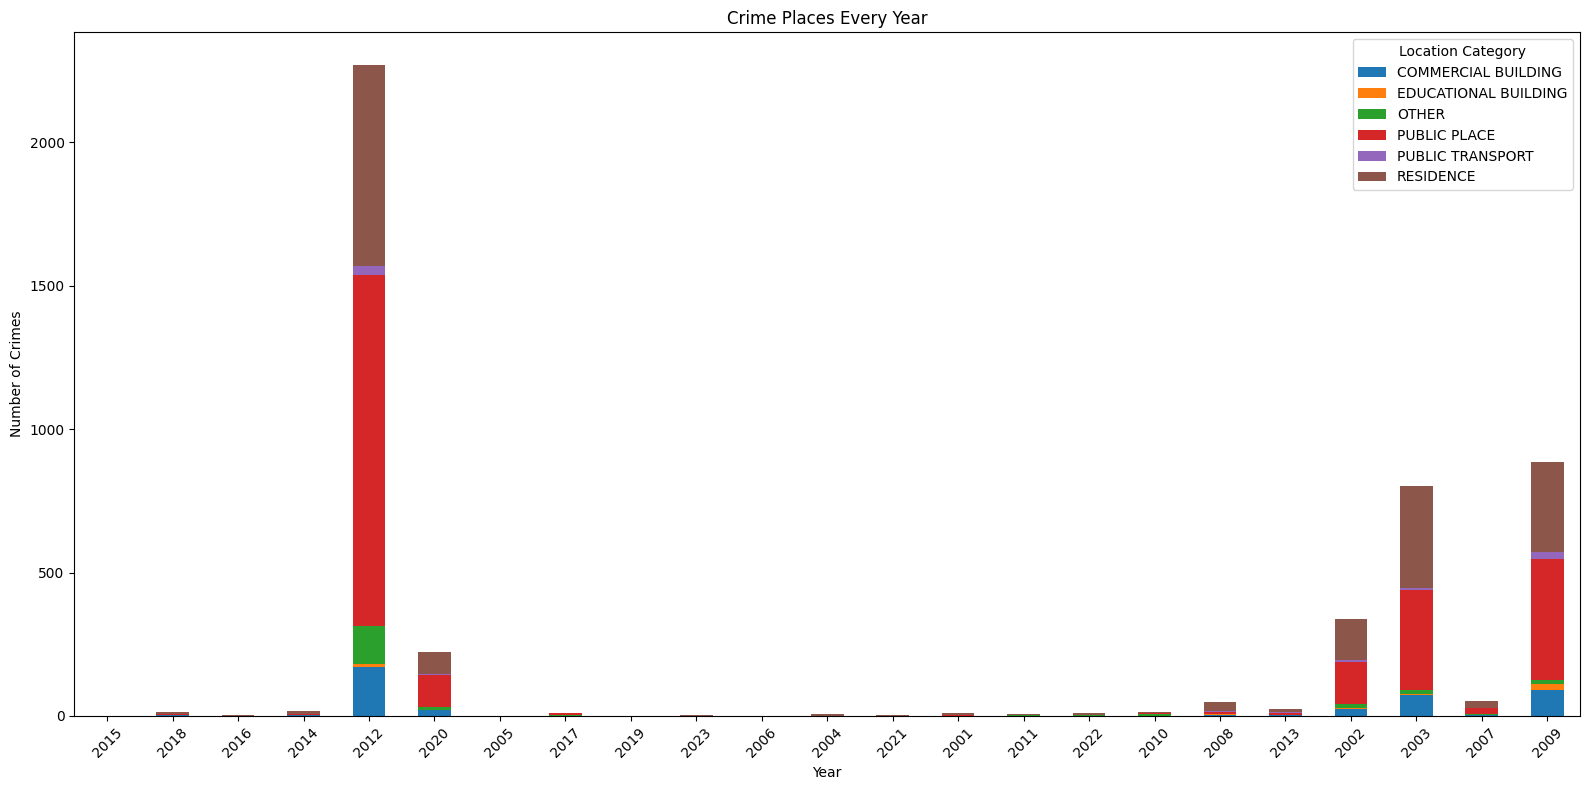

In [ ]:
#Define the unique year bins
year_bins = df['Year'].astype(str).unique()

# Group the data by year and Location Category, and count the number of occurrences
crime_places_yearly = df.groupby(['Year', 'Location Category']).size().unstack(fill_value=0)

# Plot the chart
crime_places_yearly.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crime Places Every Year')
plt.xticks(range(len(year_bins)), year_bins, rotation=45)
plt.legend(title='Location Category', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# **Hotspot Mapping**

In [ ]:
df['Location Category'] = df['Location Description'].map(location_mapping).fillna('OTHER')
threshold = 2000

#Group by location category, count crimes, and assign hotspot labels
hotspot_labels = (df.groupby('Location Category').size() > threshold).astype(int)
hotspot_labels.name = 'Crime_Hotspot'  # Assign a name to the Series object
df = df.merge(hotspot_labels, on='Location Category', how='left')# Merge the hotspot labels back to the original dataframe based on location category

df['Crime_Hotspot'] = df['Crime_Hotspot'].fillna(0).astype(int)

disp=['ID','IUCR','Primary Type','Year','Location Category','Crime_Hotspot']
df[disp].sample(35)

,ID,IUCR,Primary Type,Year,Location Category,Crime_Hotspot
3883,12290474,560,ASSAULT,2021,COMMERCIAL BUILDING,0
1348,4195171,1020,ARSON,2005,PUBLIC PLACE,1
1815,4107384,1320,CRIMINAL DAMAGE,2005,PUBLIC PLACE,1
4530,4451471,920,MOTOR VEHICLE THEFT,2005,PUBLIC PLACE,1
2790,4145734,470,PUBLIC PEACE VIOLATION,2005,COMMERCIAL BUILDING,0
32,12110093,486,BATTERY,2020,RESIDENCE,0
4260,12249945,1154,DECEPTIVE PRACTICE,2020,RESIDENCE,0
609,13208812,320,ROBBERY,2023,PUBLIC TRANSPORT,0
1218,13208608,560,ASSAULT,2023,RESIDENCE,0
3379,4332511,460,BATTERY,2005,PUBLIC PLACE,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-175-7e84434a81db>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_specific['Cluster'] = kmeans.labels_


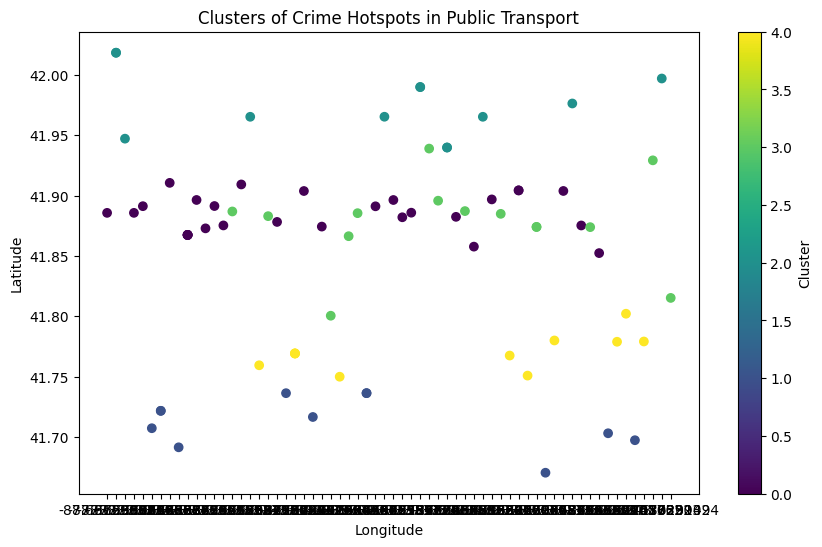

In [ ]:
df = df.dropna()
crime_data_specific = df[df['Location Category'] == 'PUBLIC TRANSPORT'] #Specific Loc
#Select useful cols
X = crime_data_specific[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=65)
kmeans.fit(X)
crime_data_specific['Cluster'] = kmeans.labels_ #Add a new column to the DataFrame indicating the cluster for each data point


# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(crime_data_specific['Longitude'], crime_data_specific['Latitude'], c=crime_data_specific['Cluster'], cmap='viridis')
plt.title('Clusters of Crime Hotspots in Public Transport')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Find the cluster with the maximum number of data points
max_cluster_label = crime_data_specific['Cluster'].mode().iloc[0]
max_cluster_data = crime_data_specific[crime_data_specific['Cluster'] == max_cluster_label]

min_longitude = max_cluster_data['Longitude'].min()
max_longitude = max_cluster_data['Longitude'].max()
min_latitude = max_cluster_data['Latitude'].min()
max_latitude = max_cluster_data['Latitude'].max()
print("Range of longitude with the maximum number of plots:", min_longitude, "to", max_longitude)
print("Range of latitude with the maximum number of plots:", min_latitude, "to", max_latitude)

'''Max Crime Rate'''
most_common_longitude = crime_data_specific['Longitude'].mode().iloc[0]
most_common_latitude = crime_data_specific['Latitude'].mode().iloc[0]

print("Longitude with the maximum number of plots:", most_common_longitude)
print("Latitude with the maximum number of plots:", most_common_latitude)

common_location_crimes = crime_data_specific[
    (crime_data_specific['Longitude'] == most_common_longitude) &
    (crime_data_specific['Latitude'] == most_common_latitude)]

num_crimes_at_common_location = len(common_location_crimes)

print("Number of crimes at the most common longitude and latitude coordinates:", num_crimes_at_common_location)

Range of longitude with the maximum number of plots: -87.62599372 to -87.67649739
Range of latitude with the maximum number of plots: 41.85238521 to 41.91061261
Longitude with the maximum number of plots: -87.62634257
Latitude with the maximum number of plots: 41.86742869
Number of crimes at the most common longitude and latitude coordinates: 5


# **Decision Tree Classifier using mapped Arrest values of 0&1**

In [ ]:
columns = ['IUCR', 'Primary Type', 'Description', 'Location Description','District', 'FBI Code', 'Year', 'Latitude', 'Longitude', 'Arrest Bin'] #Use in DT

# Define the feature columns (excluding 'ID' and 'ArrestBin')
feature_columns = ['IUCR', 'Primary Type', 'Description', 'Location Description','District', 'FBI Code','Year', 'Latitude', 'Longitude']

target_column = 'Arrest Bin'
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, ['IUCR', 'Primary Type', 'Description', 'Location Description', 'District', 'FBI Code'])])

clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier', DecisionTreeClassifier())])

X_train, X_test, y_train, y_test = train_test_split(df[feature_columns], df[target_column], test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8536842105263158


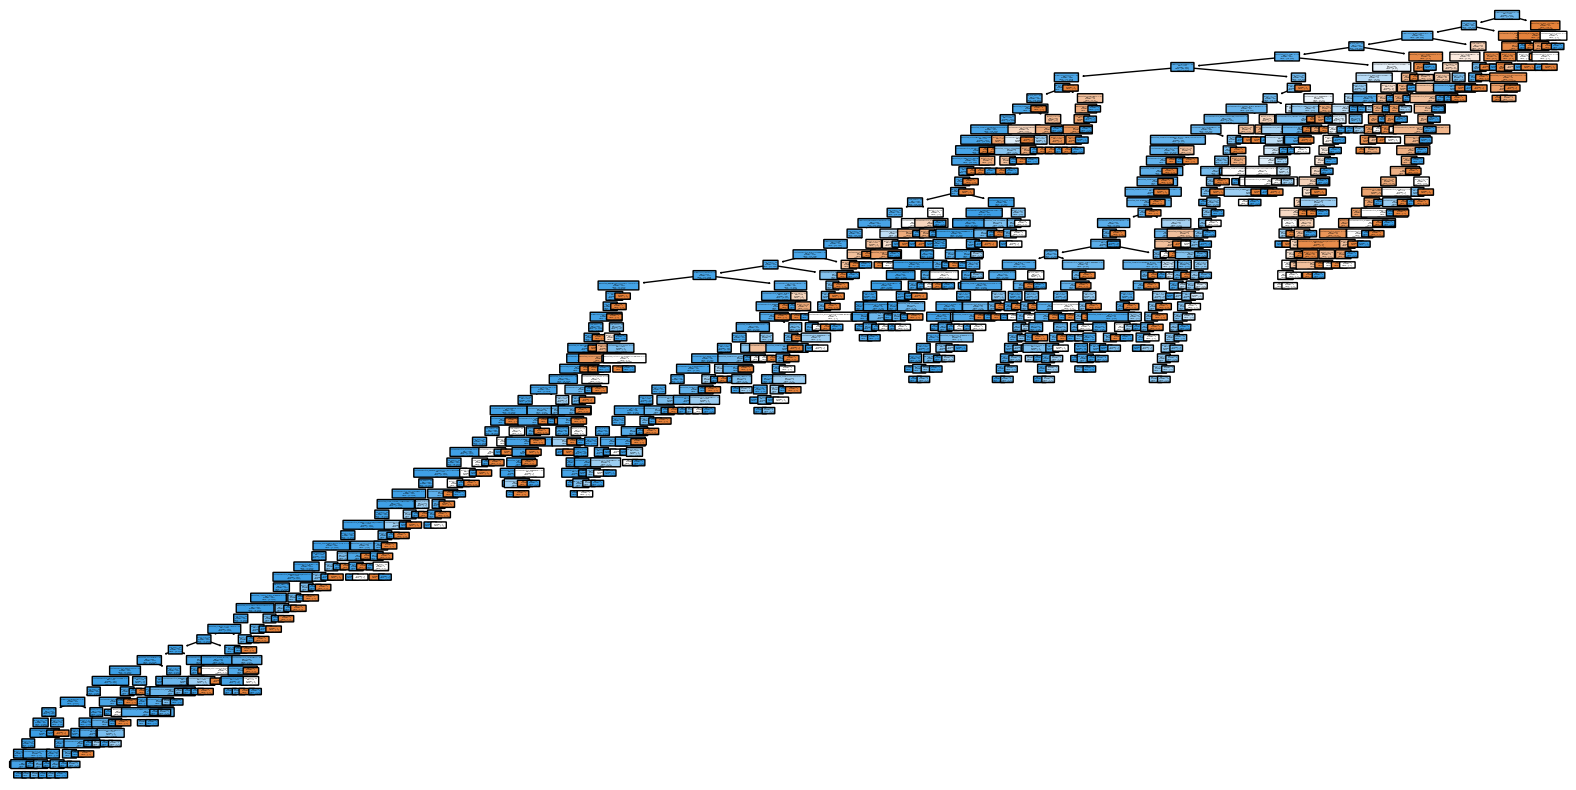

In [ ]:
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['IUCR', 'Primary Type', 'Description', 'Location Description', 'District', 'FBI Code'])

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf.named_steps['classifier'], feature_names=feature_names, class_names=['Not Arrested', 'Arrested'], filled=True, rounded=True)
plt.show()

Accuracy of pruned decision tree: 0.8778947368421053


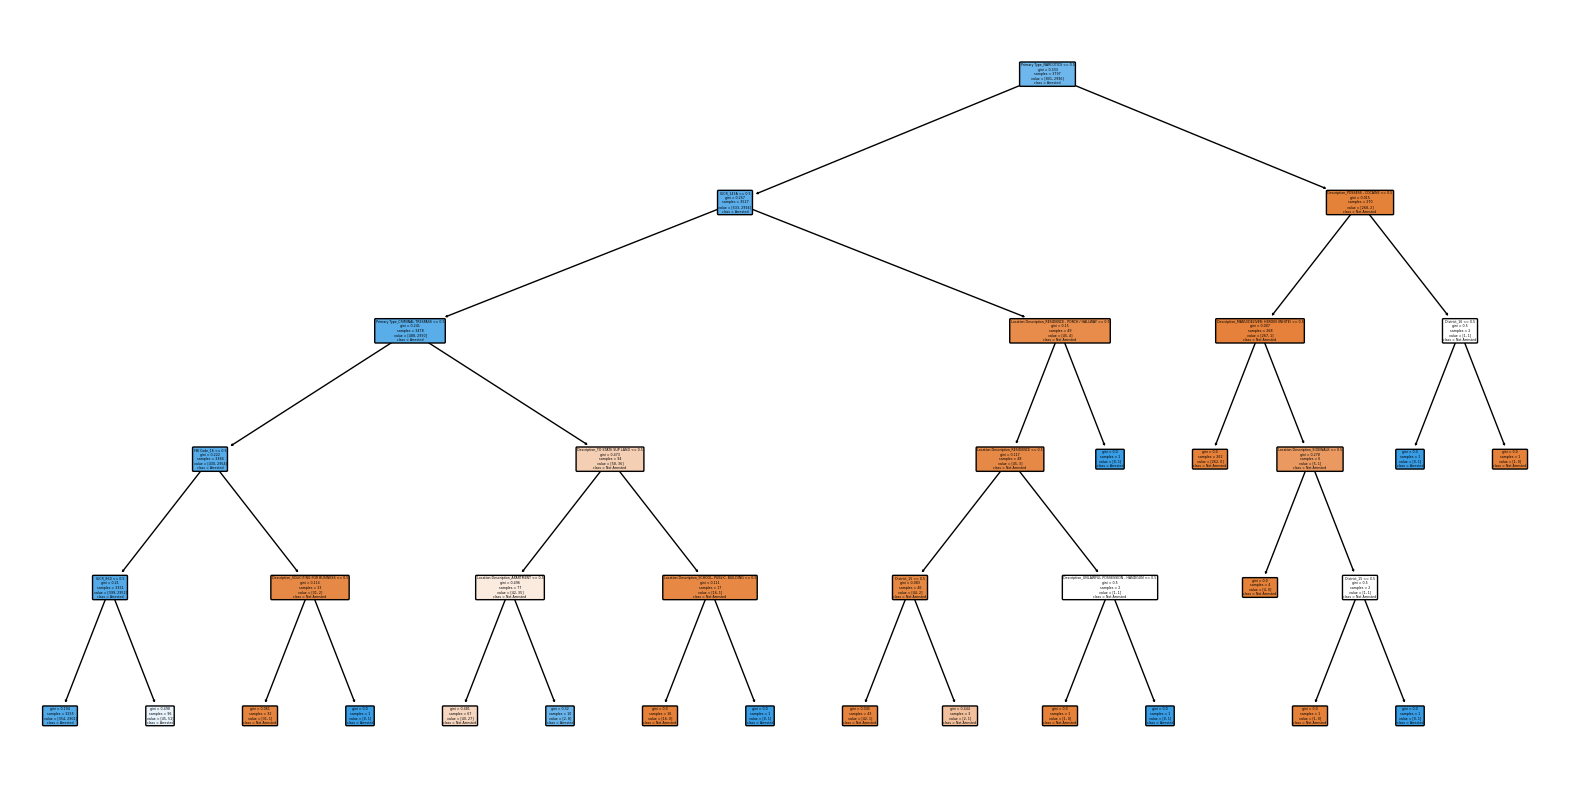

In [ ]:
pruned_clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier', DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1))])
pruned_clf.fit(X_train, y_train)

y_pred_pruned = pruned_clf.predict(X_test)

accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Accuracy of pruned decision tree: {accuracy_pruned}")

plt.figure(figsize=(20, 10))
plot_tree(pruned_clf.named_steps['classifier'], feature_names=feature_names, class_names=['Not Arrested', 'Arrested'], filled=True, rounded=True)
plt.savefig('decision_tree.png')  # Save the plot as an image

plt.show()



# **Example-based Explanation**

In [ ]:
categorical_columns = ['IUCR', 'Primary Type', 'Description', 'Location Description','District', 'FBI Code', 'Year', 'Latitude', 'Longitude', 'Arrest Bin']
df[categorical_columns] = df[categorical_columns].astype(str)

In [ ]:
columns = ['IUCR', 'Primary Type', 'Description', 'Location Description',
           'District', 'FBI Code', 'Year', 'Latitude', 'Longitude', 'Arrest Bin']
feature_columns = ['IUCR', 'Primary Type', 'Description', 'Location Description',
                   'District', 'FBI Code', 'Year', 'Latitude', 'Longitude']
target_column = 'Arrest Bin'

#Separate categorical and numerical columns
categorical_columns = ['IUCR', 'Primary Type', 'Description', 'Location Description', 'District', 'FBI Code']
numerical_columns = ['Year', 'Latitude', 'Longitude']

categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_columns)])
clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier', DecisionTreeClassifier())])
X_train, X_test, y_train, y_test = train_test_split(df[feature_columns], df[target_column], test_size=0.2, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8463157894736842


In [ ]:
example_idx = 29
example = X_test.iloc[[example_idx]]
example_prediction = pruned_clf.predict(example)[0]
example_encoded = pd.DataFrame(preprocessor.transform(example).toarray(), columns=feature_names) #Convert to model's compatibility
example_features = example_encoded.columns[example_encoded.iloc[0].to_numpy().nonzero()[0]] #Features
print(f"Example: {example_idx}")
print(f"Prediction: {'Not Arrested' if example_prediction == 1 else 'Arrested'}")

Example: 29
Prediction: Arrested


In [ ]:
print("\nFeatures contributing to the prediction:")
for feature in example_features:
    print(f"- {feature}")


Features contributing to the prediction:
- IUCR_2095
- Primary Type_NARCOTICS
- Description_ATTEMPT POSSESSION NARCOTICS
- Location Description_SIDEWALK
- District_3
- FBI Code_18


In [ ]:
print("\nFeature values:")
for feature, value in zip(example.columns, example.values[0]):
    print(f"- {feature}: {value}")


Feature values:
- IUCR: 2095
- Primary Type: NARCOTICS
- Description: ATTEMPT POSSESSION NARCOTICS
- Location Description: SIDEWALK
- District: 11
- FBI Code: 18
- Year: 2005
- Latitude: 41.88392196
- Longitude: -87.73558093
